<a href="https://colab.research.google.com/github/Malikshemi3344/datascienceproject/blob/main/datascience_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creditcard fraud detection**

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
#for creating and plotting the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import seaborn as sns
import kagglehub
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.calibration import calibration_curve
import joblib  # For saving the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

Loading the data and understanding it

In [2]:
#download the dataset and import the csv file using pandas
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
data_frame = pd.read_csv(f"{path}/creditcard.csv")
#print some data to analyze
print(data_frame.head)

100%|██████████| 66.0M/66.0M [00:00<00:00, 168MB/s]

Extracting files...


<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [3]:
data_frame.shape

(284807, 31)

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data_frame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((data_frame.isnull().sum()/len(data_frame.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [7]:
classes = data_frame['Class'].value_counts()
classes

,count
Class,
0,284315
1,492


In [8]:
valid_transactions_share =round((classes[0]/data_frame['Class'].count()*100),2)
valid_transactions_share

99.83

In [9]:
fraud_transactions_share = round((classes[1]/data_frame['Class'].count()*100),2)
fraud_transactions_share

0.17

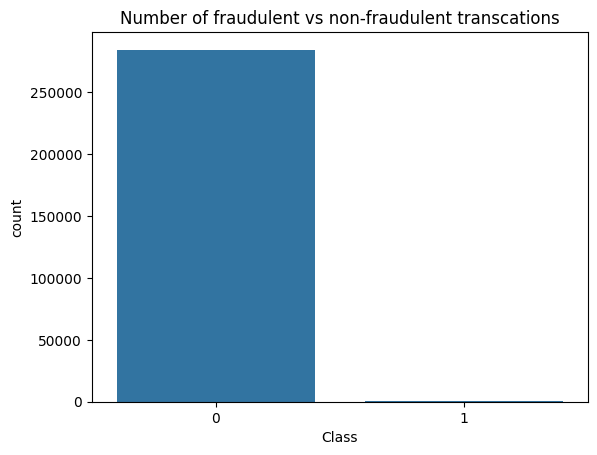

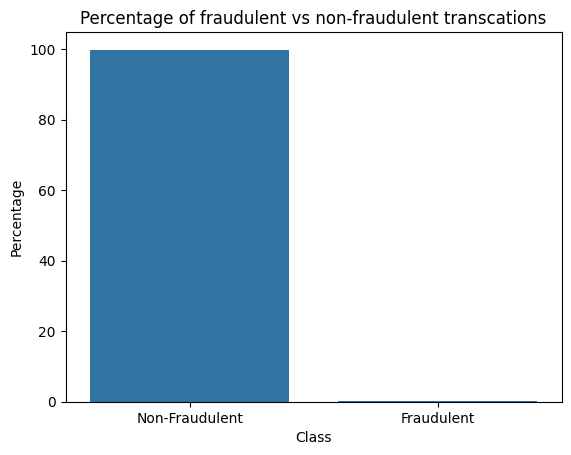

In [16]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data_frame)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_cases_percentage= {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[valid_transactions_share, fraud_transactions_share]}
df_fraud_cases_percentage = pd.DataFrame(fraud_cases_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_cases_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [12]:
# Creating dataframe for fraudulent transactions
fraudulent_transactions= data_frame[data_frame['Class'] == 1]

# Creating dataframe for non-fraudulent transactions
valid_transactions= data_frame[data_frame['Class'] == 0]

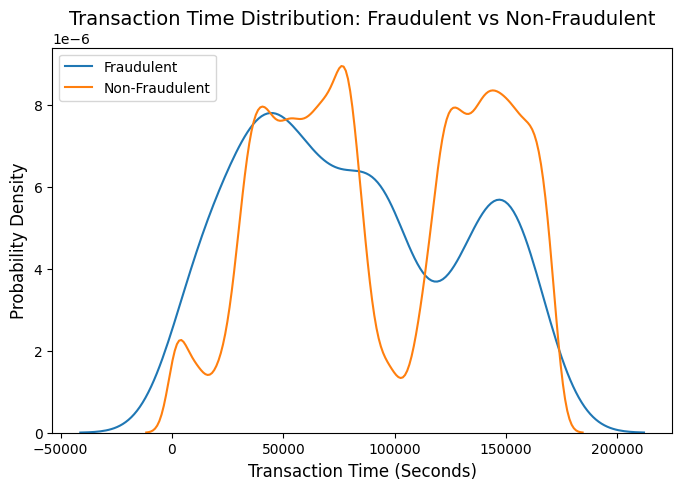

In [13]:
# Distribution plot
plt.figure(figsize=(8, 5))

# Plot for fraudulent transactions
sns.kdeplot(data=fraudulent_transactions['Time'], label='Fraudulent', fill=False)

# Plot for non-fraudulent transactions
sns.kdeplot(data=valid_transactions['Time'], label='Non-Fraudulent', fill=False)

# Adding labels and title
plt.xlabel('Transaction Time (Seconds)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Transaction Time Distribution: Fraudulent vs Non-Fraudulent', fontsize=14)
plt.legend()

# Display the plot
plt.show()

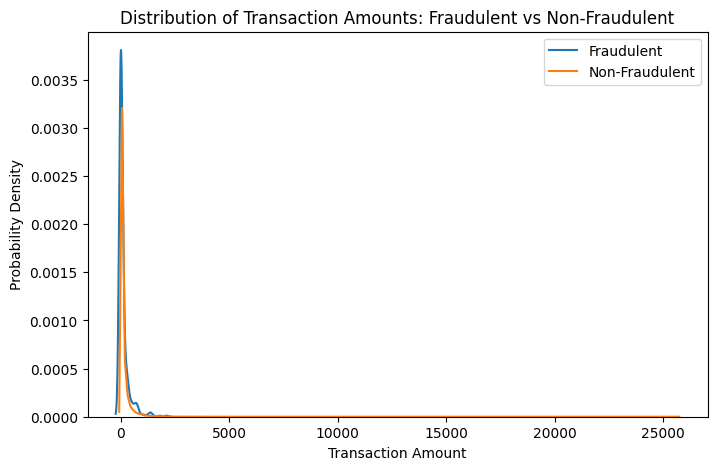

In [17]:
# Distribution plot
plt.figure(figsize=(8, 5))

# Plot for fraudulent transaction amounts
fraudulent_amount_plot = sns.kdeplot(data=fraudulent_transactions['Amount'], label='Fraudulent', fill=False)

# Plot for non-fraudulent transaction amounts
non_fraudulent_amount_plot = sns.kdeplot(data=valid_transactions['Amount'], label='Non-Fraudulent', fill=False)

# Adding labels and title
fraudulent_amount_plot.set(xlabel='Transaction Amount', ylabel='Probability Density')
plt.title('Distribution of Transaction Amounts: Fraudulent vs Non-Fraudulent')
plt.legend()

# Display the plot
plt.show()

In [ ]:
#print the shape of the data as well as the descrisption for all the fields
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [ ]:
#determine the fraud cases and valid transactions
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases:{}'.format(len(data[data['Class']==1])))
print('Valid Transactions:{}'.format(len(data[data['Class']==0])))
corrmat = data.corr()


0.0017304750013189597
Fraud Cases:492
Valid Transactions:284315


In [ ]:
#apply thresholding:map correlation values to -1,0 and 1
#1:perfect positive linear correlation
#-1:perfect negative linear correlation
#0:no linear correlation
corr_discrete = corrmat.applymap(lambda x: 1 if x > 0.5 else (-1 if x < -0.5 else 0))

<ipython-input-8-28d14be5675e>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  corr_discrete = corrmat.applymap(lambda x: 1 if x > 0.5 else (-1 if x < -0.5 else 0))


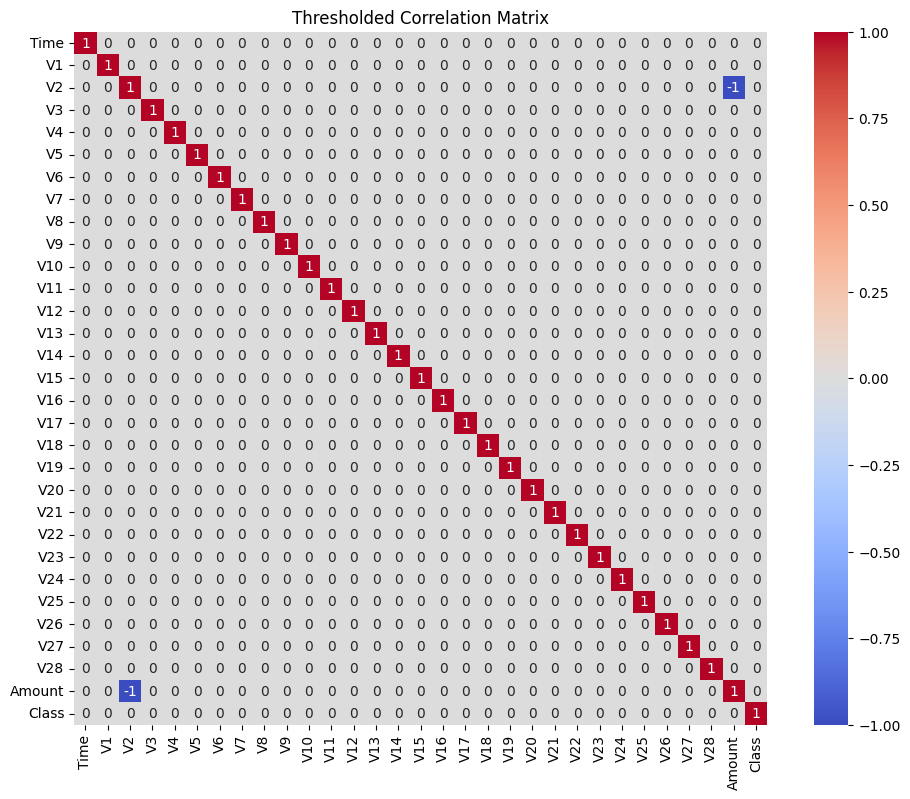

In [ ]:
#plotting heatmap for the  correlation matrix
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr_discrete,annot=True,cmap="coolwarm",square=True,cbar=True)
plt.title("Thresholded Correlation Matrix")
plt.show()

In [ ]:
#seprate the feature and tragets/labels
X = data.drop(columns=['Class'])
y = data['Class']
#splite the data into traing and test set using sklearn library
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
#Now in order to handle class imbalance we will apply smote (Synthetic Minority Over-sampling Technique)
#It is a technique that reduces imbalance in datasets by creating synthetic samples of the minority class which in our case is the fradulent transactions
#For now, we are trying to create 1000 more samples for our fraud class
desired_samples_class_1 = 1000
#apply smote
somte = SMOTE(sampling_strategy={1:desired_samples_class_1},random_state=42,)
X_train_smote,y_train_smote = somte.fit_resample(X_train,y_train)
#check the  number of samples in the combined dataset
print("Orignal training samples:",len(X_train))
print("synthetic samples gernated for class 1:",len(X_train_smote)-len(y_train))
#here we notice that SMOTE tried to return as many samples as it can depending upon the class diversity available
print("Total samples in combined trianing dataset:",len(X_train_smote))
  #combined X and y data for the resampling training dataset
resampled_data = pd.concat([X_train_smote,y_train_smote],axis=1)
#save all data in new csv
resampled_data.to_csv("resampled_creditcard_fraud.csv",index=False)
print("synthetic samples saved to'resampled_creditcard_fraud.csv'")

Orignal training samples: 227845
synthetic samples gernated for class 1: 606
Total samples in combined trianing dataset: 228451
synthetic samples saved to'resampled_creditcard_fraud.csv'


In [ ]:
#scaling the data
#logistic regration is sensitive to feature scales,so we use StandardScaler to standardize the data
#StandardScaler scales the dta so that each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
#fit the scaler on the the training data and transform it to make the data standardized
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
#use the same scaler(already fit on the training data)to tranform the test data
#this ensures that the test data is scaled using the same scaling factors as a training data
X_test_scaled = scaler.transform(X_test)
#intializ the logistic regression model
#here we are specifying
#'max_iter=5000':allow the model run to 5000 ilteratioms(model having troble converging with less iterstion than this)
#solver='saga':this is an optimization algorithim,particularly good for large dataset or sparse data(so the model converges wirh ease)
#`random_state=42`: Ensures reproducibility of results
log_reg = LogisticRegression(max_iter=5000,solver='saga',random_state=42)
#fit the model on the training data
#Train the Logistic Regression model
# .fit() method trains the model using the scaled training data (X_train_smote_scaled)
log_reg.fit(X_train_smote_scaled,y_train_smote)
#make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)
# .predict_proba() method gives probabilities for each class (0 or 1).
# We're taking probabilities for the positive class (fraudulent transactions) with [:, 1]
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:,1]

**Evaluating Model Perfromance**


===confusion matrix===
[[56836    28]
 [   23    75]]


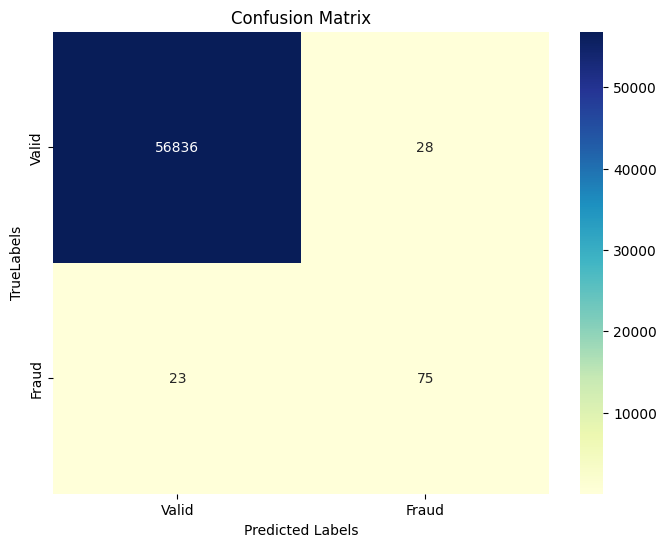


===classification report===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.77      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy (manual calculation): 0.9991 (99.91%)
Accuracy (sklearn calculation): 0.9991 (99.91%)


In [ ]:
# Confusion Matrix
# The confusion matrix helps us evaluate the performance of our model by showing the count of the following
# True Positive (TP): correctly predicted fraud cases, True Negative (TN): correctly predicted valid transactions
# False Positive (FP): incorrectly predicted fraud cases (valid transactions predicted as fraud), False Negative (FN): incorrectly predicted valid transactions (fraud cases predicted as valid)
conf_matrix = confusion_matrix(y_test,y_pred)
#print the confusion matrix
print("\n===confusion matrix===")
print(conf_matrix)
#visualizing the confusion martic
#using heatmap for better visual representation
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu",xticklabels=['Valid','Fraud'],yticklabels=['Valid','Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("TrueLabels")
plt.show()
# The classification report provides a detailed evaluation of the model
# Precision: The percentage of correctly predicted fraud cases
# Recall: The percentage of correctly predicted fraud instances among all actual fraud cases
# F1-score: The harmonic mean of precision and recall
#  Support: The number of actual instances of each class in the dataset
class_report = classification_report(y_test,y_pred)
print("\n===classification report===")
print(class_report)
#calculate accuracy
#(True positives+True negatives)/total samples
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()
#we aslo use accuracy_score function from scikilearn to calculate acuracy
accuracy_sklearn = accuracy_score(y_test,y_pred)
#print the accuracy
print(f"Accuracy (manual calculation): {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"Accuracy (sklearn calculation): {accuracy_sklearn:.4f} ({accuracy_sklearn * 100:.2f}%)")


In [1]:
# Listing the columns
all_columns = X_train_scaled_df.columns
all_columns

NameError: name 'X_train_scaled_df' is not defined

In [ ]:
plot_counter = 0
plt.figure(figsize=(17, 28))

for column in all_columns:  # Renamed variable for column list
    plot_counter += 1
    plt.subplot(6, 5, plot_counter)
    sns.histplot(X_train_scaled_df[column], kde=True)  # Changed to `histplot` for compatibility with newer versions
    plt.title(f"{column} Skewness: {X_train[column].skew():.2f}")

plt.tight_layout()  # To avoid overlapping of subplots
plt.show()